This is the first markdown cell

In [9]:
%pip install -Uqq fastai duckduckgo_search

Note: you may need to restart the kernel to use updated packages.


In [10]:
from duckduckgo_search import ddg_images
from fastcore.all import *

def search_images(term, max_images=30):
    print(f"Searching for '{term}'")
    return L(ddg_images(term, max_results=max_images)).itemgot('image')

In [11]:
#NB: `search_images` depends on duckduckgo.com, which doesn't always return correct responses.
#    If you get a JSON error, just try running it again (it may take a couple of tries).
urls = search_images('fox photos', max_images=1)
urls[0]

Searching for 'fox photos'


/Users/simonoob/anaconda3/lib/python3.11/site-packages/duckduckgo_search/compat.py:60: UserWarning: ddg_images is deprecated. Use DDGS().images() generator
  warnings.warn("ddg_images is deprecated. Use DDGS().images() generator")
/Users/simonoob/anaconda3/lib/python3.11/site-packages/duckduckgo_search/compat.py:64: UserWarning: parameter page is deprecated
  warnings.warn("parameter page is deprecated")
/Users/simonoob/anaconda3/lib/python3.11/site-packages/duckduckgo_search/compat.py:66: UserWarning: parameter max_results is deprecated
  warnings.warn("parameter max_results is deprecated")


'https://www.pixelstalk.net/wp-content/uploads/2016/06/Photos-Download-Fox-Wallpapers-HD.jpg'

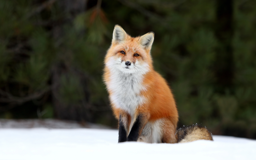

In [12]:
from fastdownload import download_url
dest = 'fox.jpg'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

Searching for 'dog photos'


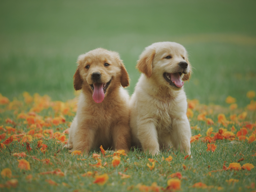

In [13]:
download_url(search_images('dog photos', max_images=1)[0], 'dog.jpg', show_progress=False)
Image.open('dog.jpg').to_thumb(256,256)

In [51]:
# delete previous fox and dog images
os.remove('fox.jpg')
os.remove('dog.jpg')

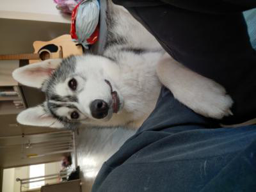

In [58]:
# get a random image from the mario folder
path = Path('./fox_or_dog_or_mario/mario')
imgs = os.listdir(path)
img = random.choice(imgs)
Image.open(path/img).to_thumb(256,256)

In [15]:
searches = 'dog','fox'
path = Path('fox_or_dog_or_mario')
from time import sleep

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} photo'))
    sleep(1)  # Pause between searches to avoid over-loading server
    download_images(dest, urls=search_images(f'{o} sun photo'))
    sleep(1)
    download_images(dest, urls=search_images(f'{o} shade photo'))
    sleep(1)
    resize_images(path/o, max_size=400, dest=path/o)

Searching for 'dog photo'
Searching for 'dog sun photo'
Searching for 'dog shade photo'
Searching for 'fox photo'
Searching for 'fox sun photo'
Searching for 'fox shade photo'


In [16]:
# from distutils.dir_util import copy_tree

# copy_tree("../input/mario-photos/mario", './fox_or_dog_or_mario/mario')

resize_images(path/'mario', max_size=400, dest=path/'mario')


In [17]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

110

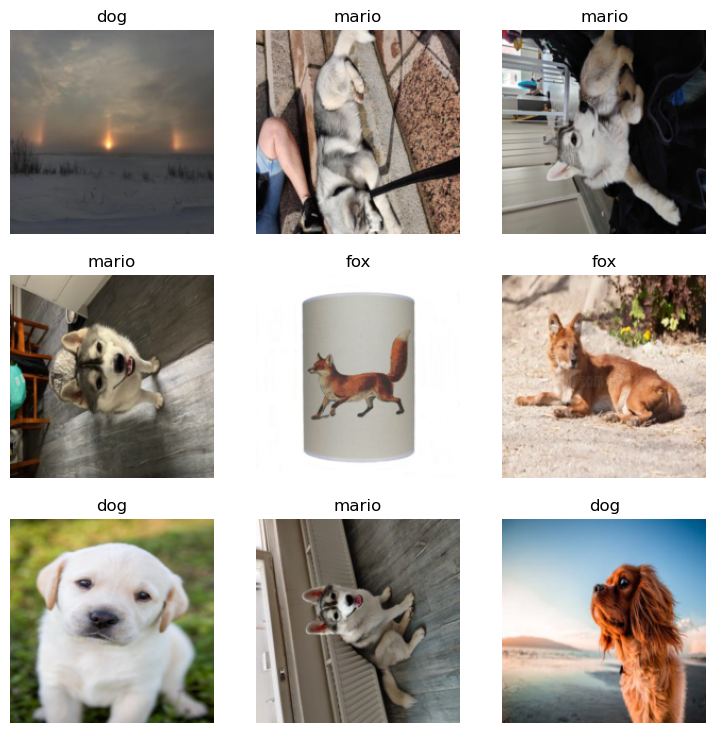

In [18]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=9)

In [20]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(5)

epoch,train_loss,valid_loss,error_rate,time
0,1.253603,0.183436,0.047619,00:03


epoch,train_loss,valid_loss,error_rate,time
0,0.209715,0.093116,0.023810,00:04
1,0.141761,0.048934,0.011905,00:04
2,0.093025,0.057178,0.011905,00:04
3,0.078886,0.060674,0.023810,00:05
4,0.060263,0.060367,0.023810,00:04


This is a: mario.
Probability it is a mario: 0.6262


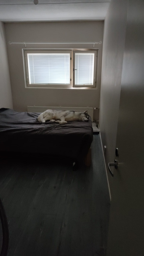

In [76]:
categories = ['dog', 'fox', 'mario']
chosenCategory = random.choice(categories)
baseFolder = f'./fox_or_dog_or_mario/{chosenCategory}'
randomImageFileName = random.choice(os.listdir(baseFolder))


targetImagePath = baseFolder+'/'+randomImageFileName

targetImagePath = './testImageMario.jpeg'

category,_,probs = learn.predict(PILImage.create(targetImagePath))
print(f"This is a: {category}.")
print(f"Probability it is a {category}: {probs[categories.index(category)]:.4f}")
Image.open(targetImagePath).to_thumb(256,256)
